# Importing 

In [59]:
import numpy
import pylab

#This module has the fit code
import SterileSearchPy as ssp

#And this will bring in code for cute plots
import SterilePlotting

# Hypotheses are managed by the HypTools module:
import HypTools

In [60]:
%matplotlib inline

# Configuration

In [61]:
#An object of type "DataPaths" is used to set where we find all the data.
# make one like this:
dp=ssp.DataPaths()

#For this notebook we will set these two:
dp.squids_files_path="/data/user/bjones/Sterilizer/Sterilizer/conventional_fluxes/"
dp.prompt_squids_files_path="/data/user/bjones/Sterilizer/Sterilizer/prompt_fluxes/"
dp.compact_file_path='/tmp/bjones/'

In [62]:
# An object of type "SteeringParams" is used to configure the fitter.
sp=ssp.SteeringParams()

#For this notebook, we set the binning, and not to read compact
sp.ReadCompact=False
sp.logEbinEdge=numpy.log10(400)
sp.logEbinWidth=0.17

In [63]:
# And an object of type "SterileNuParams" sets the hypothesis we will fit against.
#   Here we set it to the null hypothesis
#
snp=ssp.SterileNuParams()
snp.del14=0
snp.del24=0
snp.dm41sq=0
snp.modelId=0
snp.th14=0
snp.th24=0
snp.th34=0

In [64]:
# Having picked our parameters, we build the Sterilizer object.
# This is configured with one MC set and loads the data automatically
#   - but if we want to we can replace the data with something else later.
#   (see spitting and swallowing below)
# It is also configured with one set of sterile neutrino parameters,
# and one set of data paths / steering parameters. 
# See the section "Configurable parameters" below for more information on these.
#
# Note - it will take a while to build but you can watch progress on the command line.

sterilizer = ssp.Sterilizer(dp,sp,snp)

# Nuisance parameters

In [65]:
# We can probe various distributions of the MC at different values of the nuisance 
# parameters. A set of nuisance parameters is supplied via a ssp.Nuisance object.
# tab complete one to see what its members are.

# This is the default set of nuisance params
DefaultNuisance = ssp.Nuisance()

# And here is another set, but we modified the pi/k ratio by 20%
ModifiedNuisance = ssp.Nuisance()
ModifiedNuisance.piKRatio=1.2

# Getting Distributions

In [66]:
# The data and MC load automatically into histograms.
# For most of our plots we will need to know how they are binned.
# This is how we find out.

EbinsData = numpy.array(sterilizer.GetEnergyBinsData())
EbinsMC   = numpy.array(sterilizer.GetEnergyBinsMC())
ZbinsData = numpy.array(sterilizer.GetZenithBinsData())
ZbinsMC   = numpy.array(sterilizer.GetZenithBinsMC())

In [67]:
#This is how to get the data distribution. [0] means year 0, which
# is 2011. We only have this year for now.

data=sterilizer.GetDataDistribution()[0]

In [68]:
#This is how to get the expectation of the MC, with two different
#  sets of nuisance parameters

expecDefault = sterilizer.GetExpectation(DefaultNuisance)[0]
expecModPiK  = sterilizer.GetExpectation(ModifiedNuisance)[0]

In [69]:
#This will give you one random realization of the MC (realization number 1 in this case):

randomseed   = 1
realization  = sterilizer.GetRealization(DefaultNuisance,randomseed)[0]

# Plotting

In [70]:
# The SterilePlotting module has some handy default plots in it.
# Refer to and modify code therein for more advanced plots.

SterilePlotting.py:25: RuntimeWarning: divide by zero encountered in log10
  pylab.hist2d(cv_flat,ev_flat,weights=numpy.log10(data_flat), bins=(zbins,numpy.log10(ebins)),cmap=pylab.get_cmap('Blues'))


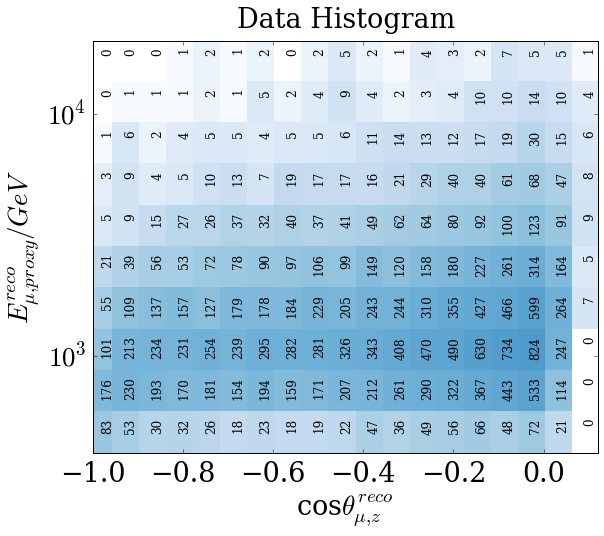

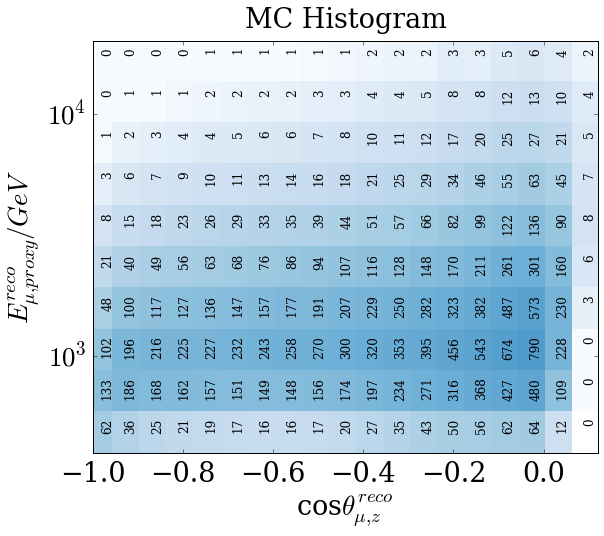

In [71]:
# This makes the absolute counts plot (two examples)
SterilePlotting.Draw2DAbsHistogram(data,bins=(EbinsData,ZbinsData),title="Data Histogram")
SterilePlotting.Draw2DAbsHistogram(expecDefault,bins=(EbinsMC,ZbinsMC),title="MC Histogram")

here


SterilePlotting.py:62: RuntimeWarning: invalid value encountered in divide
  data_flat=(((data1-data2)/data1)*100).flatten()


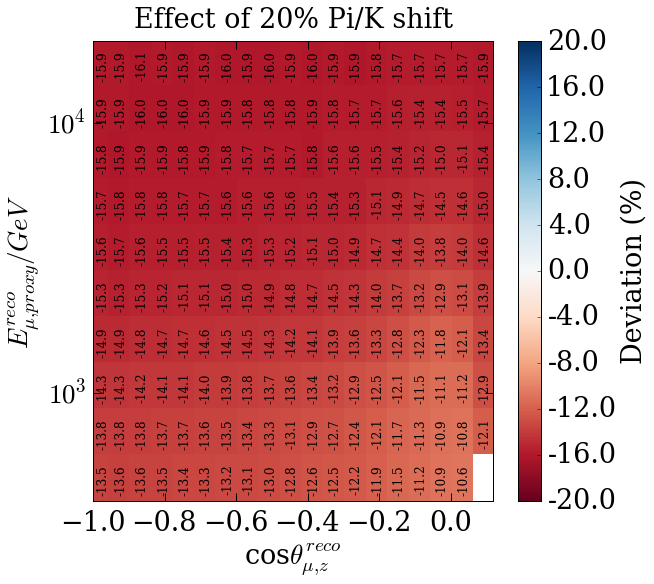

In [72]:
# This makes a ratio plot ((d1-d2)/d1)
SterilePlotting.Draw2DRatioHistogram(expecDefault,expecModPiK,bins=(EbinsData,ZbinsData),title="Effect of 20% Pi/K shift")

here


SterilePlotting.py:106: RuntimeWarning: invalid value encountered in divide
  data_flat=((data-expectation)/numpy.sqrt(expectation)).flatten()


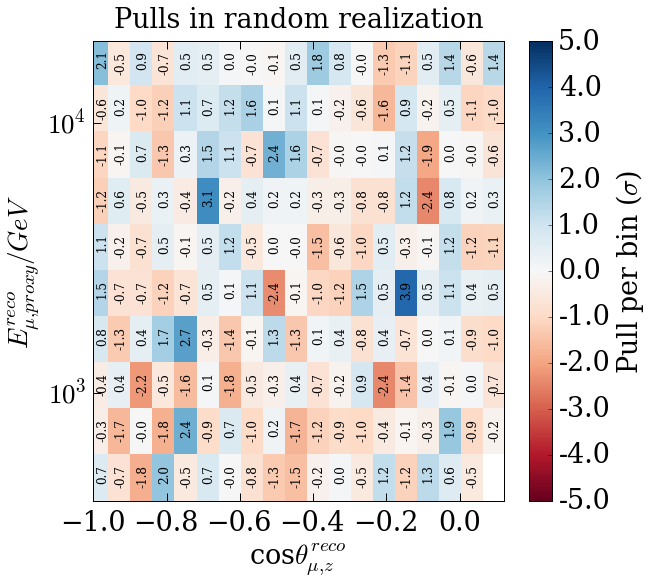

In [73]:
# This makes a pulls plot ((data-mc) / sqrt(mc))
SterilePlotting.Draw2DPullPlot(realization,expecDefault,bins=(EbinsMC,ZbinsMC),title="Pulls in random realization")

#Reading and Writing Compact 

In [74]:
# To speed up the MC loading process we can store a compact version of the data
#  and suck it in later. Here is how we store it:

# This will fail. comment for now.
#sterilizer.WriteCompact()

In [75]:
# And here is how to read it, into a new sterilizer object:
#sp.ReadCompact=True
#newsterilizer=ssp.Sterilizer(dp,sp,snp)
#newmc=newsterilizer.GetExpectation(DefaultNuisance)[0]
#EbinsNewMC = numpy.array(newsterilizer.GetEnergyBinsMC())
#ZbinsNewMC = numpy.array(newsterilizer.GetZenithBinsMC())
#SterilePlotting.Draw2DAbsHistogram(newdata,bins=(EbinsNewMC,ZbinsNewMC),title="New Data")

# Spitting and Swallowing

In [76]:
# We can get data, expectations and realizations out as actual event lists. Like this:
DataList         = sterilizer.SpitData()
RealizationList  = sterilizer.SpitRealization(DefaultNuisance,randomseed)
ModRealizationList  = sterilizer.SpitRealization(ModifiedNuisance,randomseed)
ExpectationList  = sterilizer.SpitExpectation(DefaultNuisance)


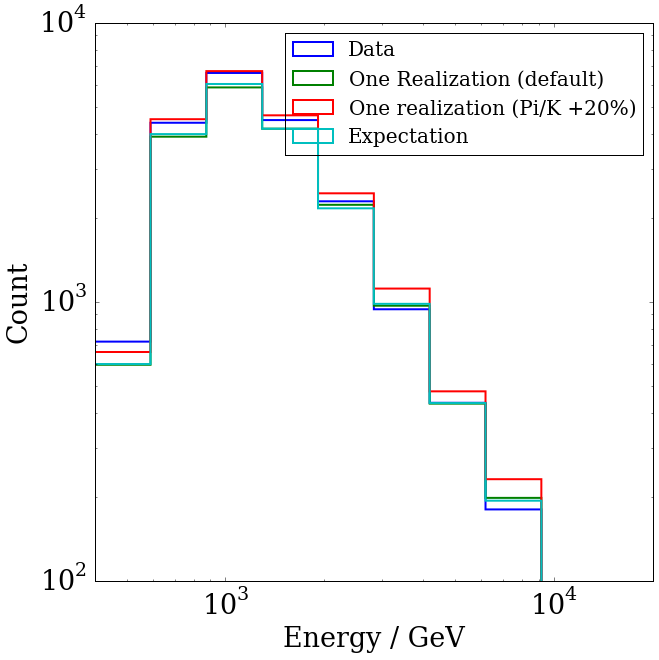

In [77]:
# The format of each entry is [energy, zenith, year, weight]. So we might plot energy like this, for example:
pylab.figure(figsize=(10,10))
bins=sterilizer.GetEnergyBinsMC()
pylab.hist(DataList[:,0],weights=DataList[:,3],label="Data",histtype='step',linewidth=2,bins=bins)
pylab.hist(RealizationList[:,0],weights=RealizationList[:,3],label="One Realization (default)",bins=bins,histtype='step',linewidth=2)
pylab.hist(ModRealizationList[:,0],weights=ModRealizationList[:,3],label="One realization (Pi/K +20%)",bins=bins,histtype='step',linewidth=2)
pylab.hist(ExpectationList[:,0],weights=ExpectationList[:,3],label="Expectation",bins=bins,histtype='step',linewidth=2)
pylab.loglog()
pylab.xlabel("Energy / GeV")
pylab.xlim(400,20000)
pylab.ylabel("Count")
pylab.legend(loc='upper right')

In [78]:
#We can also pass an event list back into the fitter as it was data. We do that as follows:
sterilizer.Swallow(RealizationList)

ArgumentError: Python argument types in
    Sterilizer.Swallow(Sterilizer, numpy.ndarray)
did not match C++ signature:
    Swallow(SterileSearch::Sterilizer {lvalue}, nusquids::marray<double, 2u, std::__1::allocator<double> >)

 # Hypotheses

In [ ]:

# Typically the hypothesis lists are contained in scan_values files. This is one we use by default:
#  (extended means we go to dm2=100 and sin2=0.001, not 10 and 0.01 as in the original version)
ScanValsFile="/data/ana/NuFSGenMC/ScanValues/scan_values_extended.3p1"

# The HypDicts object contains the mapping between scan scalues and parameters. Dig into this if you want deets.
HypDict=HypTools.Make2DHypDicts(ScanValsFile)\
# HypDict[ParamsToHypothesisNumber] - lookup table [Log10(sin2), Log10(dm2)] -> Hypothesis number
# HypDict[HypothesisNumberToParams] - lookup table  Hypothesis number -> [Log10(sin2), Log10(dm2)]
# HypDict[MaxHypID]                 - largest hypothesis number for this file
# HypDict[AllParamVals]             - List of all Log10(sin2) and Log10(dm2) values 

In [ ]:
# A more useful interface is given by the MakeSNP function
#  This makes a SterileNuParams object to initialize the sterilizer
#  based on a given hypothesis number.

# 0 is always the null hypothesis:
snpnull=HypTools.MakeSNP(ScanValsFile, 0)
print("Null point dm2, th234, ID:", snpnull.dm41sq, snpnull.th24, snpnull.modelId)

# N>0 is some other hypothesis:
snp6=HypTools.MakeSNP(ScanValsFile, 6)
print("Point 6 dm2, th234, ID:", snp6.dm41sq, snp6.th24, snp6.modelId)

In [ ]:
# This function makes the 2D scan files:

HypTools.Make2DScanFile("./TempScanFile.txt",FirstLogDM2=-2, LastLogDM2=2., LogDM2Step=0.05, FirstLogSin2=-3, LastLogSin2\
=0, LogSin2Step=0.05)

# Take a look at it:
CheckFile=open("./TempScanFile.txt")
hyp=4
print(CheckFile.readline())
print(CheckFile.readline())

# Asimov Mode

In [ ]:
# To calculate an Asimov sensitivity, we have to set the data list equal to
#  the expectation from the MC. We do that as follows:
sterilizer.SetupAsimov(DefaultNuisance)

In [ ]:
#We can check we succeeded by seeing the data and the expectation are now very similar
pylab.figure(figsize=(10,10))
DataList         = sterilizer.SpitData()
RealizationList  = sterilizer.SpitRealization(DefaultNuisance,randomseed)
ModRealizationList  = sterilizer.SpitRealization(ModifiedNuisance,randomseed)
ExpectationList  = sterilizer.SpitExpectation(DefaultNuisance)
pylab.hist(DataList[:,0],weights=DataList[:,3],label="Data",histtype='step',linewidth=2,bins=bins)
pylab.hist(RealizationList[:,0],weights=RealizationList[:,3],label="One Realization (default)",bins=bins,histtype='step',linewidth=2)
pylab.hist(ModRealizationList[:,0],weights=ModRealizationList[:,3],label="One realization (Pi/K +20%)",bins=bins,histtype='step',linewidth=2)
pylab.loglog()
pylab.xlabel("Energy / GeV")
pylab.xlim(400,20000)
pylab.ylabel("Count")
pylab.legend(loc='upper right')

In [84]:
# For example, to calculate the Asimov LLH at default nuisance params and null :
print("Asimov LLH at null:",sterilizer.EvalLLH(DefaultNuisance))

#To do it at other points, simply reset the local hypothesis of the sterilizer module and go again:
snp=HypTools.MakeSNP(ScanValsFile, 6)
# sterilizer.SetSterileNuParams(dp,sp,snp) - will fail because we need to make fluxes
print("Asimov LLH at point 6:", sterilizer.EvalLLH(DefaultNuisance))

('Asimov LLH at null:', 649.5282000200741)
('Asimov LLH at point 6:', 649.5282000200741)


# Configurable Parameters

In [ ]:
# In SteeringParams:

# Data / MC Configuration
sp.useBurnSample       # Whether to load burnsample or full data
sp.ReadCompact         # Read compact or full data and mc
sp.xs_model_name       # Which cross section model to use
sp.modelName           # Which flux model to use
sp.oversizeFunction    # Which oversize function to use
sp.simToLoad           # Which simulation set to load

#Binning
sp.cosThbinEdge        # Cos theta binning
sp.cosThbinWidth       #  --
sp.maxCosth            #  --
sp.minCosth            #  --

sp.logEbinEdge         # Energy binning
sp.logEbinWidth        #  --
sp.maxFitEnergy        #  --
sp.minFitEnergy        #  --

#Livetime
sp.years               # which years to load
sp.burnSampleLivetime  # total livetime of burn sample
sp.fullLivetime        # total livetime of full sample

#Technical stuff
sp.useFactorization    # Whether to enable oscillation factorization
sp.evalThreads         # How many threads to use for evaluating fits
sp.quiet               # Control program verbosity

In [ ]:
#List of datapaths parameters:

dp.compact_file_path  # Compact data processed and dumped to disk (.dat) is
dp.data_path          # Full scale data file (.hdf5) is
dp.domeff_spline_path # Dom efficiency correction splines are (.dat)
dp.mc_path            # Where the full scale MC files are after processEnergy (.hdf5)
dp.oversize_path      # Oversize correction function for changing oversize MC to non-oversize MC (.dat)
dp.squids_files_path  # Conventional atmospheric flux evolved by squids for various osc hypotheses are (.hdf5)
dp.prompt_squids_files_path  # as above but the prompt flux (.hdf5)
dp.xs_spline_path     # Cross section splines (.fits) 
dp.flux_splines_path  # Flux splines (.fits) are - for factorized mode only